**Ant Colony Optimization - Computação Natural 2020.3**

Por: Ana Catarina Gomes da Fonseca Pereira

In [ ]:
c = [
[6734, 1453],
[2233, 10],
[5530, 1424],
[401, 841],
[3082, 1644],
[7608, 4458],
[7573, 3716],
[7265, 1268],
[6898, 1885],
[1112, 2049],
[5468, 2606],
[5989, 2873],
[4706, 2674],
[4612, 2035],
[6347, 2683],
[6107, 669],
[7611, 5184],
[7462, 3590],
[7732, 4723],
[5900, 3561],
[4483, 3369],
[6101, 1110],
[5199, 2182],
[1633, 2809],
[4307, 2322],
[675, 1006],
[7555, 4819],
[7541, 3981],
[3177,756],
[7352, 4506],
[7545, 2801],
[3245, 3305],
[6426, 3173],
[4608, 1198],
[23, 2216],
[7248, 3779],
[7762, 4595],
[7392, 2244],
[3484, 2829],
[6271, 2135],
[4985, 140],
[1916, 1569],
[7280, 4899],
[7509, 3239],
[10, 2676],
[6807, 2993],
[5185, 3258],
[3023, 1942]
]


In [ ]:
import matplotlib.pyplot as plt

#PARÂMETROS

alfa = 0.5
beta = 0.7 
p = 0.25
t_max = 0.8
t_min = 0.2
MAX_IT = 1000
initial_value = 0.00005
NUM_FORMIGAS = 30
EXECUCOES = 30

#Cidades
cidades = c
N_CIDADES = len(cidades)

In [ ]:
import math
#Calcula a distância das cidades apenas uma vez

def calcular_dist(cidades):
  matriz_cid = [] #Matriz N x N de cidades
  for i in range(0, N_CIDADES):
    for j in range(0, N_CIDADES):
      dist = math.sqrt(math.pow(cidades[i][0] - cidades[j][0], 2) + math.pow(cidades[i][1] - cidades[j][1], 2))
      matriz_cid.append(dist)
  return matriz_cid

In [ ]:
#Define o feromonio inicial
def init_phero(phero):
  for i in range(0, N_CIDADES * N_CIDADES):
    phero.append(initial_value)
  return phero

def evap_phero(phero):
  for i in range(0, N_CIDADES * N_CIDADES):
    phero[i] *= (1-p)
  return phero

def get_distance(solution, matriz_distancias):
  distance = 0
  # print(solution, '\n', matriz_distancias)
  for i in range(N_CIDADES):
    if i == N_CIDADES -1:
      distance += matriz_distancias[solution[i] * N_CIDADES + 0]
    else:
      distance += matriz_distancias[solution[i] * N_CIDADES + solution[i+1]]
    # print(distance, '\n ',i)
  return distance

def depo_phero(solution, phero, matriz_distancias):
  f = 1/get_distance(solution, matriz_distancias)
  for i in range(0, N_CIDADES):
    if i == N_CIDADES -1:
      phero[(solution[i] * N_CIDADES +  solution[0])] += f
      phero[(solution[0] * N_CIDADES +  solution[i])] += f
    else:     
      phero[(solution[i] * N_CIDADES +  solution[i+1])] += f
      phero[(solution[i+1] * N_CIDADES +  solution[i])] += f
  return phero


In [ ]:
import random

def build_solution(matriz_distancias, phero, cid_list):
  solution = []
  initial_city = random.randint(0, N_CIDADES - 1)
  solution.append(initial_city)
  while len(solution) < N_CIDADES:
    prob = []
    for i in range(0, N_CIDADES):
      if i not in solution:
        last_city = solution[-1]
        prob.append(((1/matriz_distancias[(last_city * N_CIDADES + i)]) ** alfa) * (phero[last_city * N_CIDADES + i] ** beta))
      else:
        prob.append(0)
    soma = sum(prob)
    for i in range(0, N_CIDADES):
      prob[i] = prob[i] / soma
    solution.append(random.choices(cid_list, weights=prob, k=1)[0])
  return solution

In [ ]:
def aco():
  #cidades:

  cid_list = [i for i in range(0, N_CIDADES)] #lista só de indices
  matriz_distancias = calcular_dist(cidades)
  # print(matriz_distancias)
  #pheromonio
  phero = []
  phero = init_phero(phero)
  best = 99999999
  for i in range(MAX_IT):
    #solucoes
    solutions = []
    for formiga in range(NUM_FORMIGAS):
      solutions.append(build_solution(matriz_distancias, phero, cid_list))
    # print(solutions)
    #Phero 
    phero = evap_phero(phero)
    for formiga in range(NUM_FORMIGAS):
      phero = depo_phero(solutions[formiga], phero, matriz_distancias)
    for formiga in range(NUM_FORMIGAS):
      dist = get_distance(solutions[formiga], matriz_distancias)
      # print(formiga, dist)
      if dist < best:
        best = dist
    # print('IT: ', i, 'Best: ', best)
  return best

In [ ]:
def print_results(dados):
  print('melhor: ',min(dados))
  print('media: ', sum(dados)/len(dados))
  plt.boxplot(dados)
  plt.show()

In [ ]:
dados = []
for i in range(EXECUCOES):
  dados.append(aco())

print_results(dados)

In [ ]:
def aco_max_min_system():
  #cidades:

  cid_list = [i for i in range(0, N_CIDADES)] #lista só de indices
  matriz_distancias = calcular_dist(cidades)
  # print(matriz_distancias)
  #pheromonio
  phero = []
  phero = init_phero(phero)
  best = 99999999
  for i in range(MAX_IT):
    #solucoes
    solutions = []
    for formiga in range(NUM_FORMIGAS):
      solutions.append(build_solution(matriz_distancias, phero, cid_list))
    # print(solutions)
    #Phero 
    phero = evap_phero(phero)
    #Diferenca apenas no deposito do phero
    lista_dist = []
    for formiga in range(NUM_FORMIGAS):
      dist = get_distance(solutions[formiga], matriz_distancias)
      lista_dist.append(dist) #salva as distancias
      if dist < best:
        best = dist
    #deposita apenas na melhor
    for formiga in range(NUM_FORMIGAS):
      if lista_dist[formiga] == best:
        phero = depo_phero(solutions[formiga], phero, matriz_distancias)      
  return best

In [ ]:
dados_max = []
for i in range(EXECUCOES):
  dados_max.append(aco())

melhor:  56357.29977911417
media:  58826.23302749084


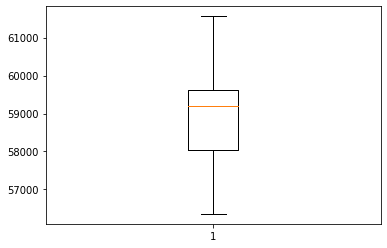

In [ ]:
print_results(dados_max)